In [1]:
import pandas as pd

police_calls = pd.read_csv('../data/police_calls_2018.csv')

In [2]:
police_calls = police_calls.drop(columns="geometry")

What kinds of police calls occurred most often in 2018?

In [3]:
police_calls['Tencode Description'].value_counts()

Business Check                                 155317
Traffic Violation                              142824
Want Officer for Investigation / Assistance    122040
Administrative/Special Assignment               38204
Community Policing Activity                     34166
Suspicious Person                               28700
Disorderly Person                               28128
Vehicle Accident - Property Damage              28027
Safety Hazard                                   25510
Burglary - Residence                            18017
Burglary - Non-Residence                        17153
Theft                                           15642
Investigate 911 Hang-Up Call                    14116
Vehicle Blocking Right of Way                    7495
Vehicle Accident - Personal Injury               7489
Fight / Assault                                  5096
Shots Fired                                      4619
Fixed Post                                       2750
Meal Break                  

Where did these calls originate (which zipcodes)?

In [4]:
police_calls = police_calls.rename(columns= {'Tencode Description': 'tencode_description'})
police_calls.head()
### We could do a bar chart for the top 3 tencode descriptions by zipcode count

,Event Number,Call Received,Complaint Number,Shift,Tencode,tencode_description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,zipcode,PO
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,PD201800174217,02/16/2018 05:58:00 PM,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,37076,HERMITAGE


In [5]:
top_five_calls = police_calls.loc[police_calls.tencode_description.isin(['Business Check','Traffic Violation', 'Want Officer for Investigation / Assistance', 'Administrative/Special Assignment', 'Community Policing Activity'])]

In [66]:
business_check_tencodes = top_five_calls.loc[top_five_calls.tencode_description.isin(['Business Check'])]
business_check_tencodes = business_check_tencodes['zipcode'].value_counts()
business_check_tencodes = business_check_tencodes.reset_index().sort_values('zipcode', ascending=False)
business_check_tencodes.columns = ['Zipcode', 'Counts']
business_check_tencodes

traffic_tencodes = top_five_calls.loc[top_five_calls.tencode_description.isin(['Traffic Violation'])]
traffic_tencodes = traffic_tencodes['zipcode'].value_counts()
traffic_tencodes = traffic_tencodes.reset_index().sort_values('zipcode', ascending=False)
traffic_tencodes.columns = ['Zipcode', 'Counts']

want_officer_tencodes = top_five_calls.loc[top_five_calls.tencode_description.isin(['Want Officer for Investigation / Assistance'])]
want_officer_tencodes = want_officer_tencodes['zipcode'].value_counts()
want_officer_tencodes = want_officer_tencodes.reset_index().sort_values('zipcode', ascending=False)
want_officer_tencodes.columns = ['Zipcode', 'Counts']

admin_tencodes = top_five_calls.loc[top_five_calls.tencode_description.isin(['Administrative/Special Assignment'])]
admin_tencodes = admin_tencodes['zipcode'].value_counts()
admin_tencodes = admin_tencodes.reset_index().sort_values('zipcode', ascending=False)
admin_tencodes.columns = ['Zipcode', 'Counts']

community_tencodes = top_five_calls.loc[top_five_calls.tencode_description.isin(['Community Policing Activity'])]
community_tencodes = community_tencodes['zipcode'].value_counts()
community_tencodes = community_tencodes.reset_index().sort_values('zipcode', ascending=False)
community_tencodes.columns = ['Zipcode', 'Counts']

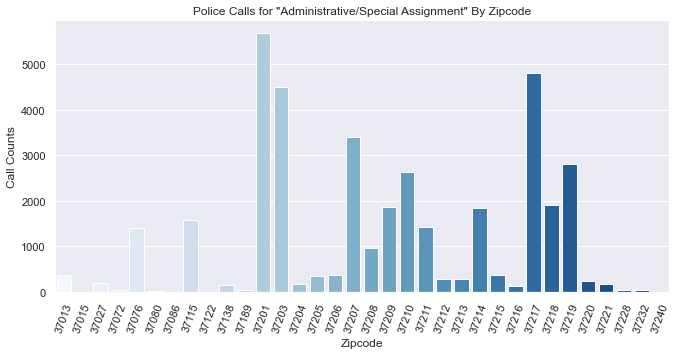

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (11, 5))
sns.set(style="darkgrid")
sns.barplot(x = 'Zipcode', 
            y = 'Counts', 
            data = admin_tencodes, 
            palette = 'Blues')
plt.xlabel('Zipcode')
plt.ylabel('Call Counts')
plt.xticks(rotation=70)
plt.title('Police Calls for "Administrative/Special Assignment" By Zipcode');

In which month do calls occur most frequently?

In [33]:
top_five_calls['Call Received'] = pd.to_datetime(police_calls['Call Received'], 
                                            format = '%m/%d/%Y %I:%M:%S %p')
top_five_calls.head()
#top_five_calls['month'] = top_five_calls['Call Received'].dt.month


/var/folders/yp/yvp41cjj7k785rj1gdry9k280000gn/T/ipykernel_75987/4058624380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_five_calls['Call Received'] = pd.to_datetime(police_calls['Call Received'],


,Event Number,Call Received,Complaint Number,Shift,Tencode,tencode_description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,zipcode,PO,month
0,PD201800174484,2018-02-16 19:09:00,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,37076,HERMITAGE,2
1,PD201800174650,2018-02-16 20:02:00,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,37076,HERMITAGE,2
2,PD201800175038,2018-02-16 22:16:00,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,37076,HERMITAGE,2
4,PD201800173907,2018-02-16 16:19:00,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,37076,HERMITAGE,2
5,PD201800174595,2018-02-16 19:41:00,20180155635,B,43,Want Officer for Investigation / Assistance,5,GONE ON ARRIVAL,500.0,DEBBIE DR,523B,H,23,36.210,-86.585,37076,HERMITAGE,2


In [40]:
call_cts_by_month = top_five_calls['month'].value_counts()
call_cts_by_month.reset_index()
call_cts_by_month.columns = ['Month', "Call_Count"]
call_cts_by_month = call_cts_by_month.reset_index()
call_cts_by_month

,index,month
0,1,70977
1,3,64711
2,2,59036
3,5,57070
4,8,55947
5,6,55632
6,4,52814
7,7,43813
8,9,32551


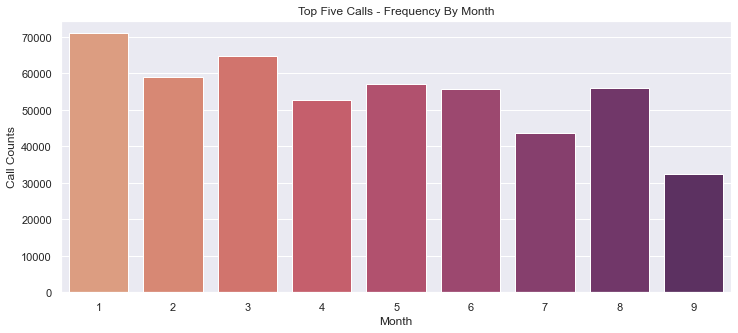

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 5))
sns.set(style="darkgrid")
sns.barplot(x = 'index', 
            y = 'month', 
            data = call_cts_by_month, 
            palette = 'flare')
plt.xlabel('Month')
plt.ylabel('Call Counts')
plt.title('Top Five Calls - Frequency By Month');

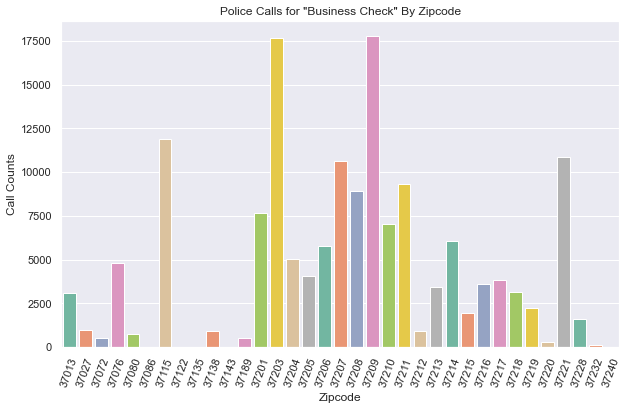

In [10]:
plt.figure(figsize = (10, 6))
sns.set(style="darkgrid")
sns.barplot(x = 'Zipcode', 
            y = 'Counts', 
            data = business_check_tencodes, 
            palette = 'Set2')
plt.xlabel('Zipcode')
plt.ylabel('Call Counts')
plt.xticks(rotation=70)
plt.title('Police Calls for "Business Check" By Zipcode');

What kinds of request for service are made to hubNashville?

In [11]:
hub = pd.read_csv('../data/hubNashville_2018.csv')

In [12]:
hub.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,Zipcode,Latitude,Longitude
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,02/12/2018 03:48:14 PM,Phone,37115.0,36.296917,-86.699162
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,02/12/2018 03:49:13 PM,Phone,37076.0,36.215403,-86.588513
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,02/07/2018 05:04:33 PM,Phone,37076.0,36.187902,-86.607286
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,02/27/2018 09:06:16 PM,hubNashville Community,37203.0,36.153761,-86.788745
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,02/08/2018 03:01:50 PM,Phone,37210.0,36.154836,-86.763345


In [13]:
hub['Request Type'].unique()

array(['Streets, Roads & Sidewalks', 'Trash, Recycling & Litter', 'Other',
       'Electric & Water General', 'Property Violations', 'Public Safety',
       'Social Services & Housing',
       'Resolved by hubNashville on First Call', 'Public Records Request',
       'Education & Libraries', 'Parks', 'Transit', 'Planning & Zoning',
       'Permits', 'Quick Requests', 'Workforce & Jobs'], dtype=object)

Are they being handled promptly?

In [19]:
hub = hub.rename(columns= {'Date / Time Opened': 'opened', 'Date / Time Closed': 'closed'})
hub['opened'] = pd.to_datetime(hub['opened'])
hub['closed'] = pd.to_datetime(hub['closed'])

In [27]:
hub['resolution_time'] = hub['closed'] - hub['opened']
hub['resolution_time'].describe()
## on average 2 weeks; not very promptly

count                         80866
mean     14 days 16:05:55.696287685
std      43 days 06:11:36.353865901
min                 0 days 00:00:00
25%          1 days 01:58:26.250000
50%                 3 days 01:16:19
75%                 8 days 11:32:00
max               938 days 02:22:16
Name: resolution_time, dtype: object

In [29]:
## Maybe join the police_calls and hub dataframes on "zipcode" and compare complaint/request open dates?
